In [53]:
using SparseArrays
using LinearAlgebra
using Plots

include("src/problems/standardLP.jl")
include("src/algorithms/utils/exitcriterion.jl")
include("src/algorithms/utils/results.jl")
include("src/algorithms/iclr_lazy.jl")
include("src/problems/dro/utils/libsvm_parser.jl")
include("src/problems/dro/wasserstein.jl")
include("src/algorithms/iclr_lazy_restart.jl")
include("src/algorithms/pdhg.jl")


pdhg (generic function with 1 method)

In [30]:
filepath = "a9a.txt"
dim_dataset = 123
num_dataset = 32561

yX_T = read_libsvm_into_yXT_sparse(filepath, dim_dataset, num_dataset)

123×32561 SparseMatrixCSC{Float64, Int64} with 451592 stored entries:
⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛

In [20]:
A_T, b, c = droreformuation_wmetric_hinge_standardformnormalized(yX_T, 0.1, 0.1)

(
⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢳⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀
⢤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠆
⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⡄⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠂
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀

In [27]:
problem = StandardLinearProgram(A_T, b, c)
exitcriterion = ExitCriterion(1000000, 300., 0.1, 10000)

ExitCriterion(1000000, 300.0, 0.1, 10000)

In [44]:
println("A_T has size: ", size(A_T))
println("A_T has nnz: ", size(findnz(A_T)[1])[1])
println("nnz ratio: ", size(findnz(A_T)[1])[1] / size(A_T))

A_T has size: (130738, 97929)
A_T has nnz: 1230024


LoadError: MethodError: no method matching /(::Int64, ::Tuple{Int64, Int64})
[0mClosest candidates are:
[0m  /(::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}, [91m::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}[39m) at int.jl:93
[0m  /(::Union{Integer, Complex{var"#s77"} where var"#s77"<:Union{Integer, Rational}}, [91m::Rational[39m) at rational.jl:323
[0m  /(::Union{Int16, Int32, Int64, Int8, UInt16, UInt32, UInt64, UInt8}, [91m::BigInt[39m) at gmp.jl:544
[0m  ...

---------

In [54]:
exitcriterion = ExitCriterion(100000, 300., 0.1, 1000)
r_iclr_lazy = iclr_lazy(problem, exitcriterion; blocksize=100, R=5)

R = 5


┌ Info: k: 1000, ICLR constraint norm: 179.44041736964274, elapsedtime: 3.821784019470215
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 2000, ICLR constraint norm: 176.27045462456678, elapsedtime: 7.6177239418029785
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 3000, ICLR constraint norm: 172.0048322302919, elapsedtime: 11.431883096694946
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 4000, ICLR constraint norm: 166.66952571238926, elapsedtime: 15.254364013671875
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 5000, ICLR constraint norm: 160.3924205893398, elapsedtime: 19.116286993026733
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 6000, ICLR constraint norm: 153.28217545663964, elapsedtime: 22.936336040496826
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info:

┌ Info: k: 51000, ICLR constraint norm: 20.838816581357722, elapsedtime: 187.9222800731659
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 52000, ICLR constraint norm: 20.9402311506307, elapsedtime: 191.55047297477722
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 53000, ICLR constraint norm: 20.888217845794948, elapsedtime: 195.20201206207275
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 54000, ICLR constraint norm: 20.694184067430392, elapsedtime: 198.82838892936707
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 55000, ICLR constraint norm: 20.350894559679848, elapsedtime: 202.46359014511108
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 56000, ICLR constraint norm: 19.883940263202643, elapsedtime: 206.0513939857483
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ 

LoadError: InterruptException:

In [55]:
exitcriterion = ExitCriterion(100000, 300., 0.1, 10000)
r_iclr_lazy = iclr_lazy(problem, exitcriterion; blocksize=100, R=5)

R = 5


┌ Info: k: 10000, ICLR constraint norm: 120.58133687273094, elapsedtime: 38.015202045440674
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 20000, ICLR constraint norm: 36.28423781023535, elapsedtime: 76.03257894515991
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 30000, ICLR constraint norm: 37.08003287216858, elapsedtime: 113.93363404273987
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 40000, ICLR constraint norm: 26.46852182678675, elapsedtime: 151.83358883857727
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 50000, ICLR constraint norm: 21.324853206755062, elapsedtime: 189.95005989074707
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ Info: k: 60000, ICLR constraint norm: 16.942521879860294, elapsedtime: 227.98928093910217
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy.jl:137
┌ 

Results([1, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000], [0.0, 38.015202045440674, 76.03257894515991, 113.93363404273987, 151.83358883857727, 189.95005989074707, 227.98928093910217, 266.15779399871826, 304.51588582992554], [183.45901195071903, 120.58133687273094, 36.28423781023535, 37.08003287216858, 26.46852182678675, 21.324853206755062, 16.942521879860294, 14.944307486011262, 14.865389109672202])

In [37]:
exitcriterion = ExitCriterion(100000, 300., 0.1, 1000)
r_pdhg = pdhg(problem, exitcriterion, L=sqrt(num_dataset))  # TODO: Try use spectral norm for L

┌ Info: k: 1000, PDHG constraint norm: 29.563153038811176, elapsedtime: 9.526831865310669
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/pdhg.jl:69
┌ Info: k: 2000, PDHG constraint norm: 7.0850355376747975, elapsedtime: 19.066107034683228
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/pdhg.jl:69
┌ Info: k: 3000, PDHG constraint norm: 3.3021173759842415, elapsedtime: 28.682904958724976
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/pdhg.jl:69
┌ Info: k: 4000, PDHG constraint norm: 6.575197541741345, elapsedtime: 38.33897686004639
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/pdhg.jl:69
┌ Info: k: 5000, PDHG constraint norm: 6.17637979191475, elapsedtime: 47.87803101539612
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/pdhg.jl:69
┌ Info: k: 6000, PDHG constraint norm: 3.7485830678790992, elapsedtime: 57.42599892616272
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/pdhg.jl:69
┌ Info: k: 7000, PDHG constraint norm: 1.767471

Results([1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000  …  23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000], [0.0, 9.526831865310669, 19.066107034683228, 28.682904958724976, 38.33897686004639, 47.87803101539612, 57.42599892616272, 66.99430799484253, 76.51754593849182, 86.1118049621582  …  220.68087100982666, 230.3437819480896, 240.02366304397583, 249.6483428478241, 259.35701990127563, 269.15580701828003, 278.84690594673157, 288.5197079181671, 298.1849739551544, 307.85186791419983], [183.45901195071903, 29.563153038811176, 7.0850355376747975, 3.3021173759842415, 6.575197541741345, 6.17637979191475, 3.7485830678790992, 1.7674717320687416, 2.5513802756617667, 3.059025531403257  …  0.5936258994002619, 0.6617487715541732, 1.0299166678363796, 1.0340393317159629, 0.6123189265331584, 0.23930646664404165, 0.7259418325685641, 0.9469051117426474, 0.7286998935197548, 0.22131938656566852])

In [38]:
exitcriterion = ExitCriterion(100000, 300., 0.1, 1000)
r_iclr_lazy_restart_x_y = iclr_lazy_restart_x_y(problem, exitcriterion)

┌ Info: k: 1000, ICLR constraint norm: 182.24282834539275, elapsedtime: 1.6862189769744873
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy_restart.jl:89
┌ Info: k: 2000, ICLR constraint norm: 182.01393340230393, elapsedtime: 3.3387770652770996
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy_restart.jl:89
┌ Info: k: 3000, ICLR constraint norm: 181.87807678003273, elapsedtime: 4.975208044052124
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy_restart.jl:89
┌ Info: k: 4000, ICLR constraint norm: 181.77511194991087, elapsedtime: 6.621427059173584
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy_restart.jl:89
┌ Info: k: 5000, ICLR constraint norm: 181.68920114198787, elapsedtime: 8.279783010482788
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy_restart.jl:89
┌ Info: k: 6000, ICLR constraint norm: 181.60955833311152, elapsedtime: 9.931344985961914
└ @ Main /home/dro/workspace/Efficient-GLP/src/a

┌ Info: k: 49000, ICLR constraint norm: 176.51462121923035, elapsedtime: 81.11905694007874
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy_restart.jl:89
┌ Info: k: 50000, ICLR constraint norm: 176.33241536923768, elapsedtime: 82.7493679523468
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy_restart.jl:89
┌ Info: k: 51000, ICLR constraint norm: 176.14726607931394, elapsedtime: 84.380038022995
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy_restart.jl:89
┌ Info: k: 52000, ICLR constraint norm: 175.95878935857226, elapsedtime: 86.05674505233765
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy_restart.jl:89
┌ Info: k: 53000, ICLR constraint norm: 175.76758850507923, elapsedtime: 87.7486960887909
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy_restart.jl:89
┌ Info: k: 54000, ICLR constraint norm: 175.5737167456186, elapsedtime: 89.38568210601807
└ @ Main /home/dro/workspace/Efficient-GLP/src/al

┌ Info: k: 97000, ICLR constraint norm: 164.59620162313962, elapsedtime: 159.3782970905304
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy_restart.jl:89
┌ Info: k: 98000, ICLR constraint norm: 164.2816475569804, elapsedtime: 160.99465203285217
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy_restart.jl:89
┌ Info: k: 99000, ICLR constraint norm: 163.96497673996822, elapsedtime: 162.6404049396515
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy_restart.jl:89
┌ Info: k: 100000, ICLR constraint norm: 163.64590745099244, elapsedtime: 164.2580440044403
└ @ Main /home/dro/workspace/Efficient-GLP/src/algorithms/iclr_lazy_restart.jl:89


Results([1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000  …  91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000], [0.0, 1.6862189769744873, 3.3387770652770996, 4.975208044052124, 6.621427059173584, 8.279783010482788, 9.931344985961914, 11.555060148239136, 13.195419073104858, 14.914276123046875  …  149.60347509384155, 151.22290897369385, 152.86131596565247, 154.4897849559784, 156.11291313171387, 157.732017993927, 159.3782970905304, 160.99465203285217, 162.6404049396515, 164.2580440044403], [183.45901195071903, 182.24282834539275, 182.01393340230393, 181.87807678003273, 181.77511194991087, 181.68920114198787, 181.60955833311152, 181.53292265708444, 181.458534204834, 181.38617319159567  …  166.42965142187794, 166.13059981760327, 165.82862031362384, 165.52433060221938, 165.21744272121305, 164.908091209029, 164.59620162313962, 164.2816475569804, 163.96497673996822, 163.64590745099244])

In [ ]:
# r_iclr_lazy = iclr_lazy(problem, exitcriterion)
# r_iclr_lazy_restart_x_y = iclr_lazy_restart_x_y(problem, exitcriterion)
# r_pdhg = pdhg(problem, exitcriterion, L=40)


In [ ]:
# TODO: number of data pass i/o number of iterations

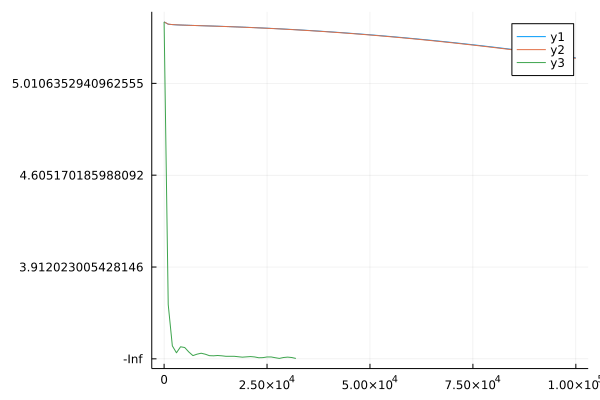

In [40]:
plot(r_iclr_lazy.iterations, r_iclr_lazy.measures, yaxis=log)
plot!(r_iclr_lazy_restart_x_y.iterations, r_iclr_lazy_restart_x_y.measures)
plot!(r_pdhg.iterations, r_pdhg.measures)


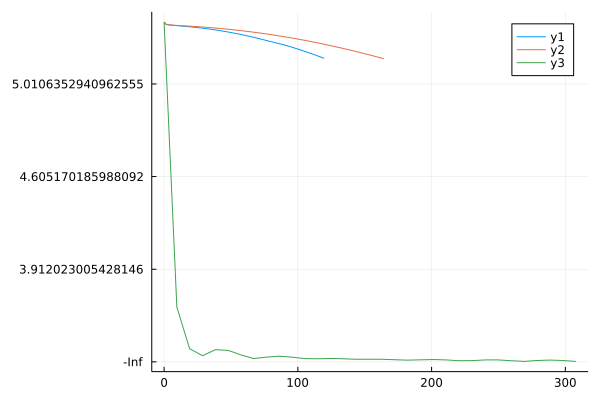

In [41]:
plot(r_iclr_lazy.times, r_iclr_lazy.measures, yaxis=log)
plot!(r_iclr_lazy_restart_x_y.times, r_iclr_lazy_restart_x_y.measures)
plot!(r_pdhg.times, r_pdhg.measures)